In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from omegaconf import OmegaConf
from src.models import models
from src.models import model as mainmodel
from src.models import modelConv2d
from src.models import modelineal
from src.models import decoders
from src import loss_func
from src import train
from src import loader
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from src import optimizer_Factory as of
import Data.genData as genData
from src import custom_plots as cp
from src import Visual_utils as vu
import torchvision
import wandb
import random
import os

from scipy.signal import savgol_filter


os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:2000"
torch.cuda.empty_cache() 
torch.manual_seed(42)

### Latent Models

In [63]:
torch.cuda.empty_cache() 
torch.manual_seed(0)

data_folder = np.load('Data/dataset_intensity.npy')
data_train = data_folder
print(data_train.shape)
dt = 0.2
train_dataloader, test_dataloader, train_x, val_x  = loader.getLoader_folder(data_train, split=True)




latentEncoder_I = mainmodel.EndPhys(dt = dt,  
                                pmodel = "Damped_oscillation",
                                init_phys = 1.0, 
                                initw=True)

latentEncoder_I, log  = train.train(latentEncoder_I, 
                                train_dataloader, 
                                test_dataloader,
                                init_phys = 1.0,                                 
                                loss_name='latent_loss')

(500, 20, 1, 50, 50)
Using device: cuda


Initial Loss 	 training loss: 2.539035439491272 	 validation loss: 3.7225773334503174
epoch: 20 	 training loss: 0.8376195728778839 	 validation loss: 1.927003026008606
epoch: 40 	 training loss: 0.10111072473227978 	 validation loss: 0.9516787528991699
epoch: 60 	 training loss: 0.028479708824306726 	 validation loss: 0.7403305172920227
epoch: 80 	 training loss: 0.016473850701004267 	 validation loss: 0.7559449076652527
epoch: 100 	 training loss: 0.007051709282677621 	 validation loss: 0.7286230325698853
epoch: 120 	 training loss: 0.010354944679420441 	 validation loss: 0.7152024507522583
epoch: 140 	 training loss: 0.002693688962608576 	 validation loss: 0.7206238508224487
epoch: 160 	 training loss: 0.001897703215945512 	 validation loss: 0.7209383845329285
epoch: 180 	 training loss: 0.004722763813333586 	 validation loss: 0.7168570756912231
epoch: 200 	 training loss: 0.009684052522061393 	 validation loss: 0.7141033411026001


In [59]:
torch.cuda.empty_cache() 
torch.manual_seed(0)

data_folder = np.load('Data/dataset_motion.npy')
data_train = data_folder
print(data_train.shape)
dt = 0.2
train_dataloader, test_dataloader, train_x, val_x  = loader.getLoader_folder(data_train, split=True)




latentEncoder_m = mainmodel.EndPhys(dt = dt,  
                                pmodel = "Damped_oscillation",
                                init_phys = 1.0,
                                initw=True)

latentEncoder_m, log  = train.train(latentEncoder_m, 
                                train_dataloader, 
                                test_dataloader,
                                init_phys = 1.0,                                 
                                loss_name='latent_loss')

(500, 20, 1, 50, 50)
Using device: cuda


Initial Loss 	 training loss: 1.8236254155635834 	 validation loss: 2.1234982013702393
epoch: 20 	 training loss: 0.04760336875915527 	 validation loss: 0.7657837271690369
epoch: 40 	 training loss: 0.009253940777853131 	 validation loss: 0.687454342842102
epoch: 60 	 training loss: 0.0076603826601058245 	 validation loss: 0.7052357792854309
epoch: 80 	 training loss: 0.009713295847177505 	 validation loss: 0.7705958485603333
epoch: 100 	 training loss: 0.007025356055237353 	 validation loss: 0.6864935159683228
epoch: 120 	 training loss: 0.011346977320499718 	 validation loss: 0.5469018816947937
epoch: 140 	 training loss: 0.011434394400566816 	 validation loss: 0.6666551828384399
epoch: 160 	 training loss: 0.006462729361373931 	 validation loss: 0.7123690843582153
epoch: 180 	 training loss: 0.00552136852638796 	 validation loss: 0.6389649510383606
epoch: 200 	 training loss: 0.011128886602818966 	 validation loss: 0.6577637791633606


In [58]:
torch.cuda.empty_cache() 
torch.manual_seed(0)

data_folder = np.load('Data/dataset_Scale_nu.npy')
data_train = data_folder
print(data_train.shape)
dt = 0.2
train_dataloader, test_dataloader, train_x, val_x  = loader.getLoader_folder(data_train, split=True)




latentEncoder_s = mainmodel.EndPhys(dt = dt,  
                                pmodel = "Damped_oscillation",
                                init_phys = 1.0,
                                initw=True)

latentEncoder_s, log  = train.train(latentEncoder_s, 
                                train_dataloader, 
                                test_dataloader,
                                init_phys = 1.0,                                 
                                loss_name='latent_loss')

(500, 20, 1, 50, 50)
Using device: cuda


Initial Loss 	 training loss: 1.3006121218204498 	 validation loss: 2.2499122619628906
epoch: 20 	 training loss: 0.06048172619193792 	 validation loss: 0.9439681768417358
epoch: 40 	 training loss: 0.06362299714237452 	 validation loss: 0.9565771222114563
epoch: 60 	 training loss: 0.044996135868132114 	 validation loss: 0.9588059782981873
epoch: 80 	 training loss: 0.062092749401926994 	 validation loss: 1.0330711603164673
epoch: 100 	 training loss: 0.04820378124713898 	 validation loss: 0.9485592842102051
epoch: 120 	 training loss: 0.05946129374206066 	 validation loss: 0.8146262168884277
epoch: 140 	 training loss: 0.050587079487740993 	 validation loss: 0.9640825986862183
epoch: 160 	 training loss: 0.04864503815770149 	 validation loss: 0.9965327978134155
epoch: 180 	 training loss: 0.048851276747882366 	 validation loss: 0.9484323263168335
epoch: 200 	 training loss: 0.05246602650731802 	 validation loss: 0.8894725441932678


### LatentSpace Comparison

In [196]:
def normalize(z, a):
    mz = np.mean(z)
    ma = np.mean(a)

    mz = np.min(z)
    ma = np.min(a)

    max_z = np.max(z)
    max_a = np.max(a)

    m = (max_a - ma)/(max_z - mz)
    n = ma - m*mz

    return m*z #+ n
def normalize_1_0(z):

    max_z = np.max(z)
    mz = np.min(z)
    

    m = (2)/(max_z - mz)

    b = 1 - m*max_z

    return m*z + b
t,a = genData.generateDynamics(max=1, min=0, dt = 0.1)

t = t[:-40]
a = a[:-40]
a = normalize_1_0(a)

n_samples = t.shape[0]
t_train = t[:int(n_samples*0.8)]
t_test = t[int(n_samples*0.8):]

a_train = a[:int(n_samples*0.8)]
a_test = a[int(n_samples*0.8):]

X = []
X.append( { 'x': t_train, 'y': a_train, 'label': 'Simulated Dynamics' , 'alpha':0.2, 'linewidth' :10.0, 'color': 'b'  } )
X.append( { 'x': t_test, 'y': a_test, 'label': '_nolegend_' , 'alpha':0.2, 'linewidth' :10.0 , 'linestyle': '--' , 'color': 'b'   } )
colors = ['b', 'orange', 'red', 'darkgreen', 'm', 'y', 'k', '#FFA500', '#800080', '#008080']
#colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf']
indx_color = 1
for dyn_type in ["Motion","Scale","Intensity"]:
#for dyn_type in ["Intensity"]:
    if dyn_type == "Motion":
        data_folder = np.load('Data/dataset_motion.npy')
        model = latentEncoder_m
    if dyn_type == "Scale":
        data_folder = np.load('Data/dataset_Scale_nu.npy')
        model = latentEncoder_s
    if dyn_type == "Intensity":
        model = latentEncoder_I
        data_folder = np.load('Data/dataset_intensity.npy')

    data_train = data_folder
    dt = 0.2
    dataloader  = loader.getLoader_folder(data_train, split=False)

    z = None

    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)


    for data in dataloader:

        input_Data, out_Data = data

        x0 = input_Data

        x0 = x0.to(device=device, dtype=torch.float)

        x2 = out_Data.to(device=device, dtype=torch.float)

        outputs = model(x0)
        z2_encoder, z2_phys=outputs

        if z is None:
            z = z2_encoder.detach().cpu().numpy()[0][0]
        else:
            z = np.vstack((z,z2_encoder.detach().cpu().numpy()[0][0]))

    z = normalize_1_0(z)

    z_train = z[:int(n_samples*0.8)]
    z_test = z[int(n_samples*0.8):]

    if z_train[0] < 0:
        z_train = -z_train
        z_test = -z_test


   

    X.append( { 'x': t_train, 'y': z_train, 'label': dyn_type , 'alpha':0.8, 'linewidth' :2.0, 'color':colors[indx_color]  } )
    X.append( { 'x': t_test, 'y': z_test, 'label': '_nolegend_' , 'alpha':0.8, 'linewidth' :2.0 , 'linestyle': '--', 'color':colors[indx_color]   } )
    indx_color += 1


    

c:\Users\aleja\Documents\TUDelft\Repository\Vphys\src\custom_plots.py:69: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x000001A09B9554E0> starts with '_'. It is thus excluded from the legend.
  first_legend = ax.legend(handles=lines[:-2], fontsize="30", loc ="upper right")
c:\Users\aleja\Documents\TUDelft\Repository\Vphys\src\custom_plots.py:69: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x000001A09B956350> starts with '_'. It is thus excluded from the legend.
  first_legend = ax.legend(handles=lines[:-2], fontsize="30", loc ="upper right")
c:\Users\aleja\Documents\TUDelft\Repository\Vphys\src\custom_plots.py:69: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x000001A09B955900> starts with '_'. It is thus excluded from the legend.
  first_legend = ax.legend(handles=lines[:-2], fontsize="30", loc ="upper right")
c:\Users\aleja\Documents\TUDelft\Repository\Vphys\src\custom_plots.py:69: UserWarning: T

<Figure size 640x480 with 0 Axes>

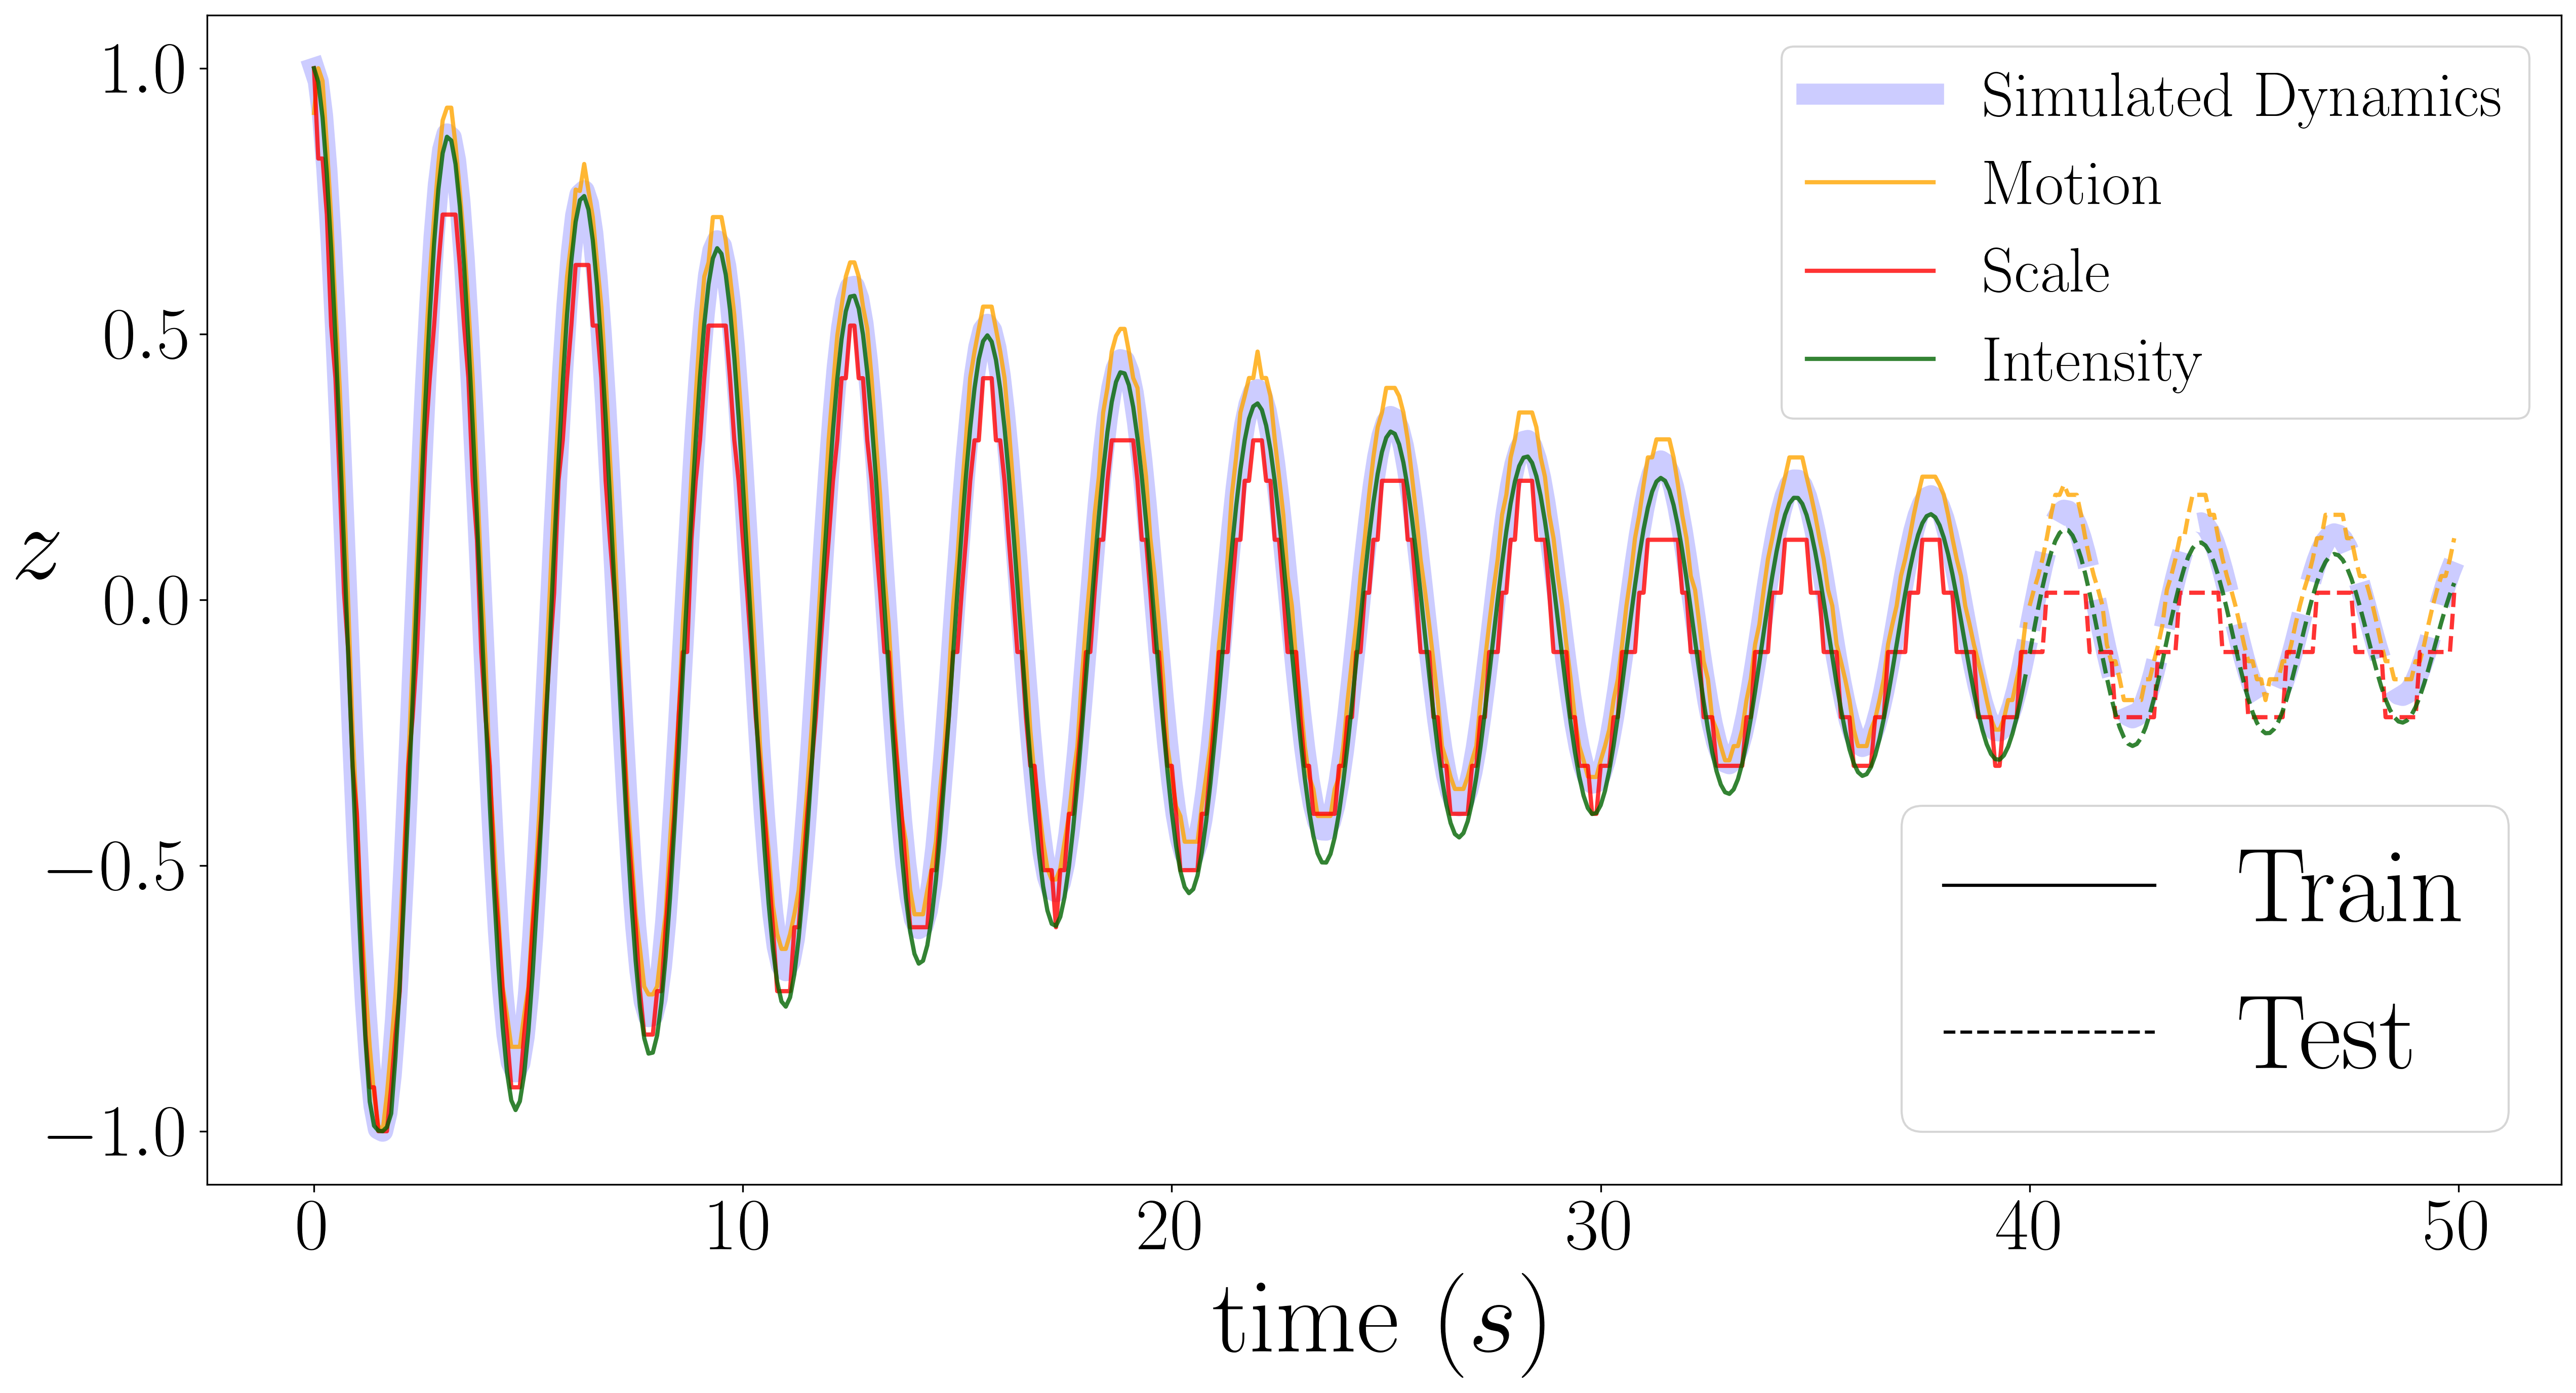

In [200]:
cp.plotMultiple( X,  'time(s)', 'value','Latent Space', 'LatenSpacePred', styleDark = False, show  = True )

### Error

In [267]:
def normalize(z, a):
    mz = np.mean(z)
    ma = np.mean(a)

    mz = np.min(z)
    ma = np.min(a)

    max_z = np.max(z)
    max_a = np.max(a)

    m = (max_a - ma)/(max_z - mz)
    n = ma - m*mz

    return m*z #+ n
def normalize_1_0(z):

    max_z = np.max(z)
    mz = np.min(z)
    

    m = (2)/(max_z - mz)

    b = 1 - m*max_z

    return m*z + b

def moving_average(signal, window_size):
    window = np.ones(window_size) / window_size
    return np.convolve(signal, window, mode='same')




t,a = genData.generateDynamics(max=1, min=0, dt = 0.1)

t = t[:-40]
a = a[:-40]
a = normalize_1_0(a)

n_samples = t.shape[0]
t_train = t[:int(n_samples*0.8)]
t_test = t[int(n_samples*0.8):]

a_train = a[:int(n_samples*0.8)]
a_test = a[int(n_samples*0.8):]

X = []

colors = ['b', 'orange', 'red', 'darkgreen', 'm', 'y', 'k', '#FFA500', '#800080', '#008080']
#colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf']
indx_color = 1
for dyn_type in ["Motion","Scale","Intensity"]:
#for dyn_type in ["Intensity"]:
    if dyn_type == "Motion":
        data_folder = np.load('Data/dataset_motion.npy')
        model = latentEncoder_m
    if dyn_type == "Scale":
        data_folder = np.load('Data/dataset_Scale_nu.npy')
        model = latentEncoder_s
    if dyn_type == "Intensity":
        model = latentEncoder_I
        data_folder = np.load('Data/dataset_intensity.npy')

    data_train = data_folder
    dt = 0.2
    dataloader  = loader.getLoader_folder(data_train, split=False)

    z = None

    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)


    for data in dataloader:

        input_Data, out_Data = data

        x0 = input_Data

        x0 = x0.to(device=device, dtype=torch.float)

        x2 = out_Data.to(device=device, dtype=torch.float)

        outputs = model(x0)
        z2_encoder, z2_phys=outputs

        if z is None:
            z = z2_encoder.detach().cpu().numpy()[0][0]
        else:
            z = np.vstack((z,z2_encoder.detach().cpu().numpy()[0][0]))

    z = normalize_1_0(z)
    if z[0] < 0:
        z = -z

    z = z.reshape(-1)    

    error = np.abs(z-a)

    window_size = 15  # Window size (must be odd)
    poly_order = 2    # Polynomial order
    #error_smooth = savgol_filter(error, window_size, poly_order)
    error_smooth = moving_average(error, window_size)

    error_train = error[:int(n_samples*0.8)]
    error_test = error[int(n_samples*0.8):]
    error_smooth_train = error_smooth[:int(n_samples*0.8)]
    error_smooth_test = error_smooth[int(n_samples*0.8):]

    

 
    
    X.append( { 'x': t_train, 'y': error_train, 'label': '_nolegend_' , 'alpha':0.3, 'linewidth' :1.0, 'color':colors[indx_color]  } )
    X.append( { 'x': t_test, 'y': error_test, 'label': '_nolegend_' , 'alpha':0.3, 'linewidth' :1.0 , 'linestyle': '--', 'color':colors[indx_color]   } )
    X.append( { 'x': t_train, 'y': error_smooth_train, 'label': dyn_type , 'alpha':1.0, 'linewidth' :2.5, 'color':colors[indx_color]  } )
    X.append( { 'x': t_test, 'y': error_smooth_test, 'label': '_nolegend_' , 'alpha':1.0, 'linewidth' :2.5 , 'linestyle': '--', 'color':colors[indx_color]   } )

    indx_color += 1

c:\Users\aleja\Documents\TUDelft\Repository\Vphys\src\custom_plots.py:69: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x000001A0B34C40D0> starts with '_'. It is thus excluded from the legend.
  first_legend = ax.legend(handles=lines[:-2], fontsize="30", loc ="upper right")
c:\Users\aleja\Documents\TUDelft\Repository\Vphys\src\custom_plots.py:69: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x000001A0B34C4310> starts with '_'. It is thus excluded from the legend.
  first_legend = ax.legend(handles=lines[:-2], fontsize="30", loc ="upper right")
c:\Users\aleja\Documents\TUDelft\Repository\Vphys\src\custom_plots.py:69: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x000001A0B34C4850> starts with '_'. It is thus excluded from the legend.
  first_legend = ax.legend(handles=lines[:-2], fontsize="30", loc ="upper right")
c:\Users\aleja\Documents\TUDelft\Repository\Vphys\src\custom_plots.py:69: UserWarning: T

<Figure size 640x480 with 0 Axes>

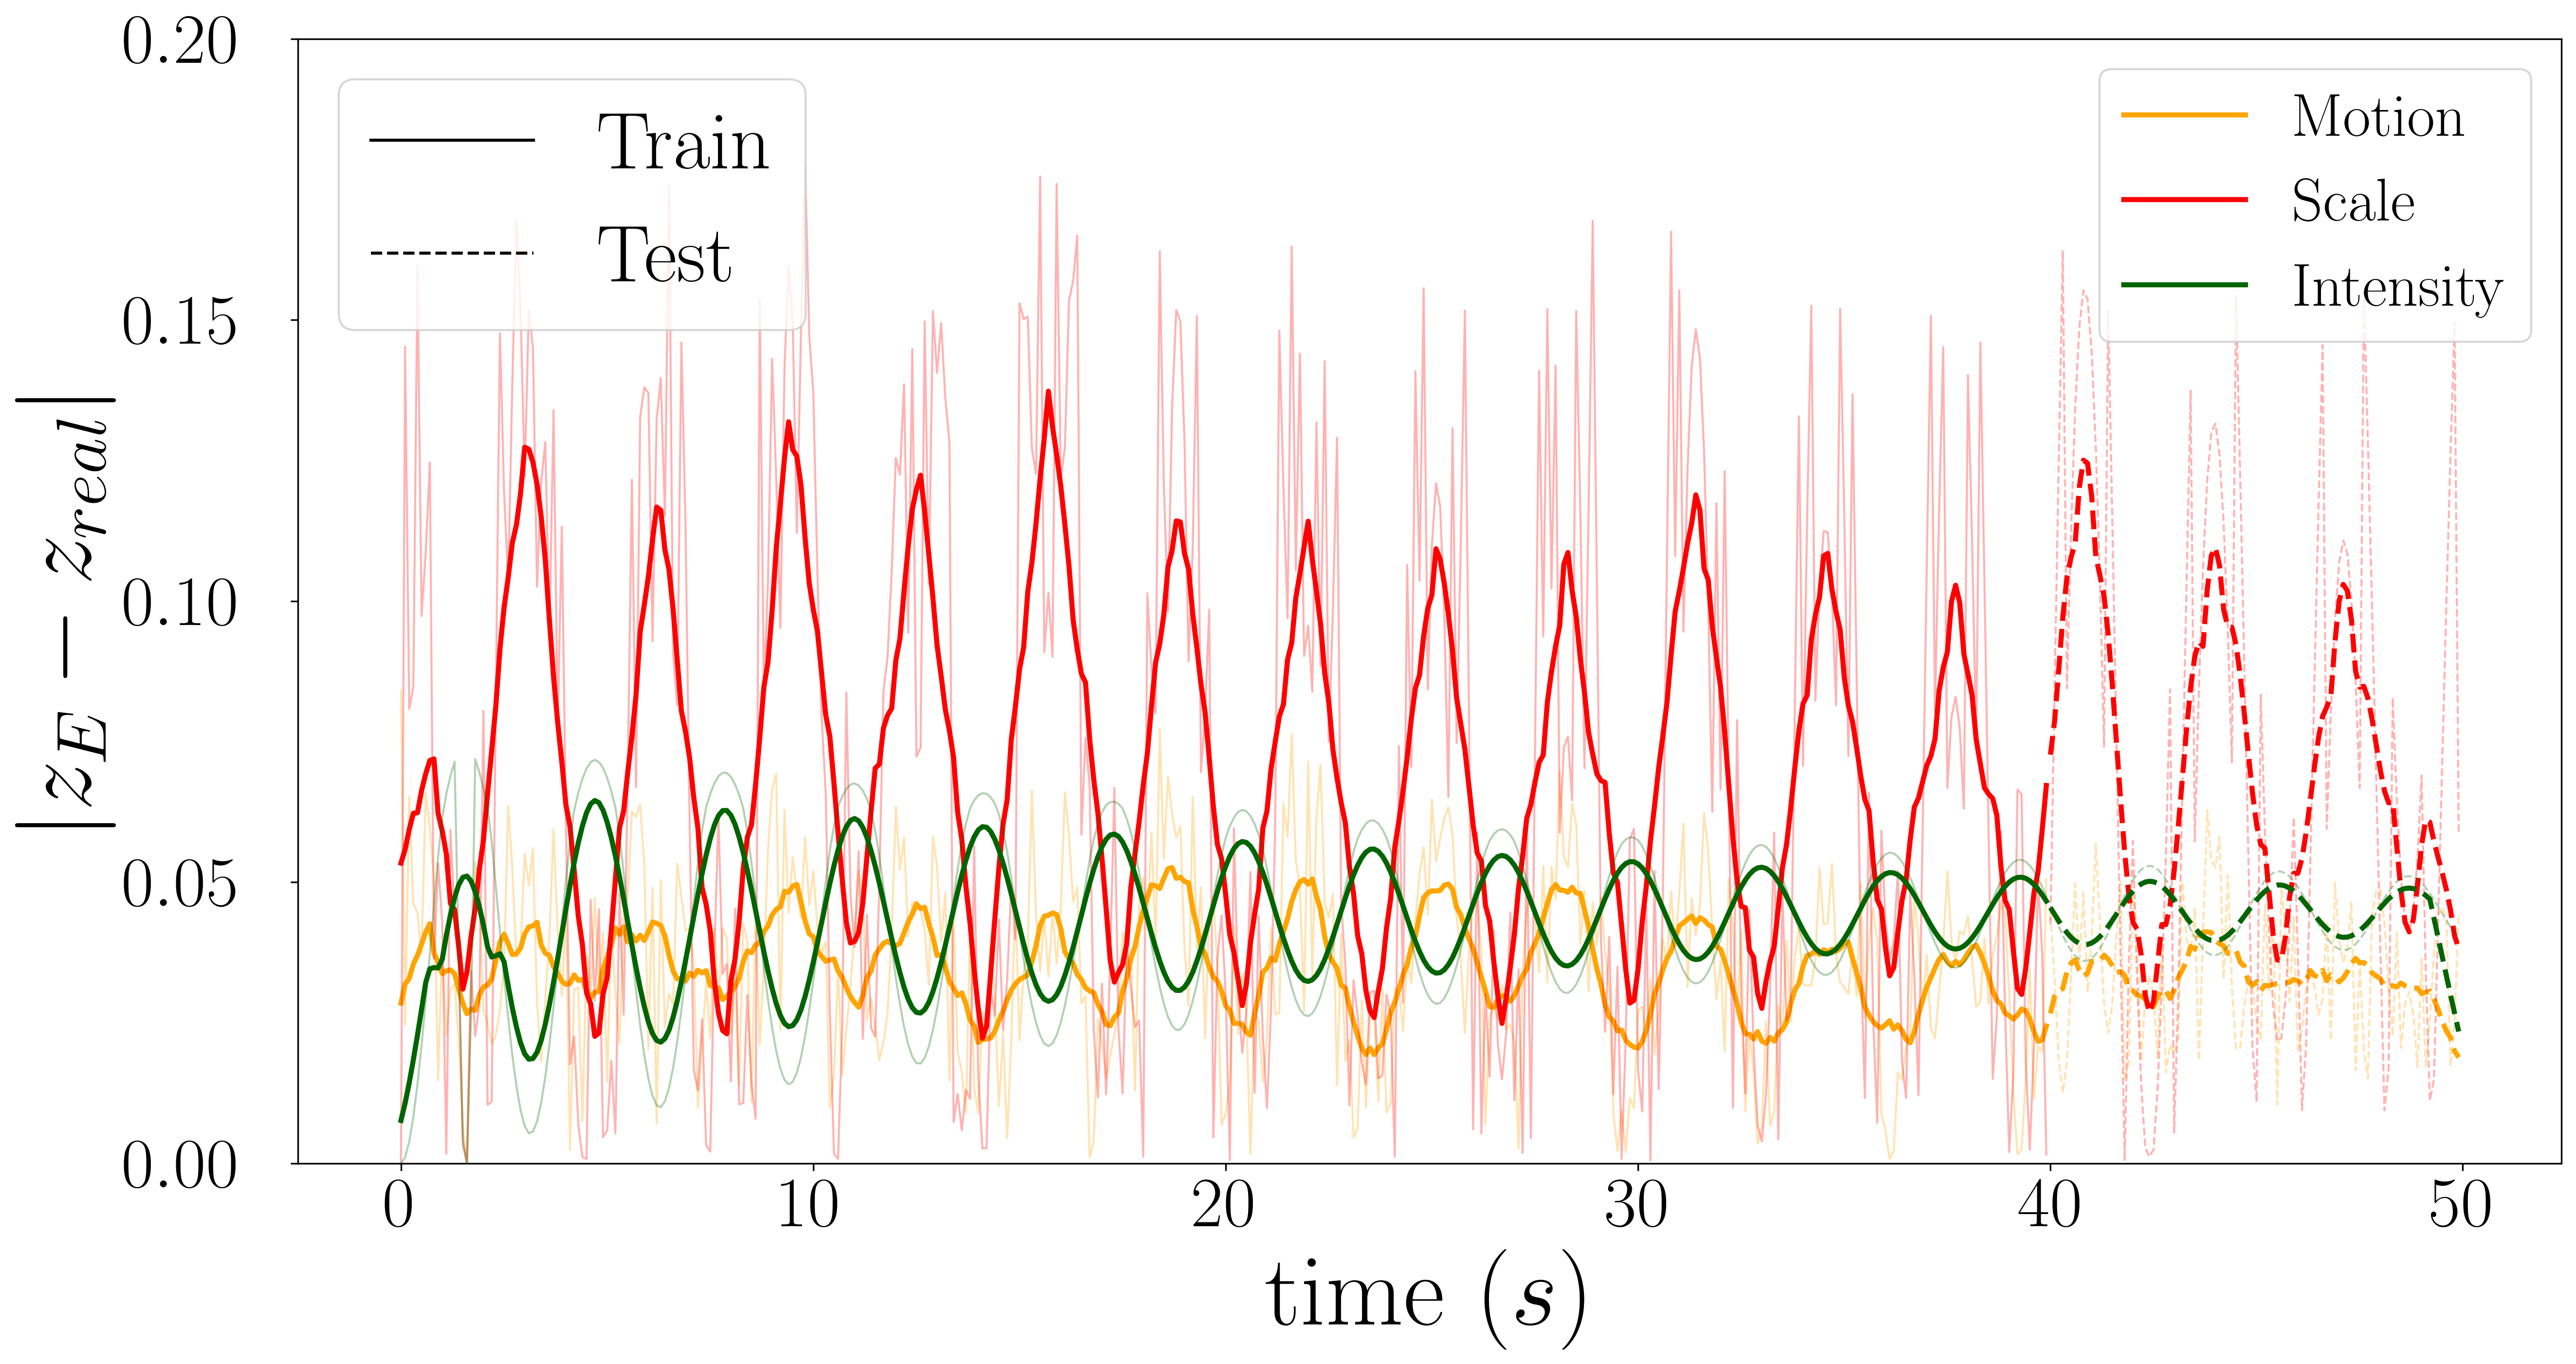

In [269]:
cp.plotMultiple( X,  'time(s)', 'value','error Latent Space', 'errLatenSpacePred', styleDark = False, show  = True )

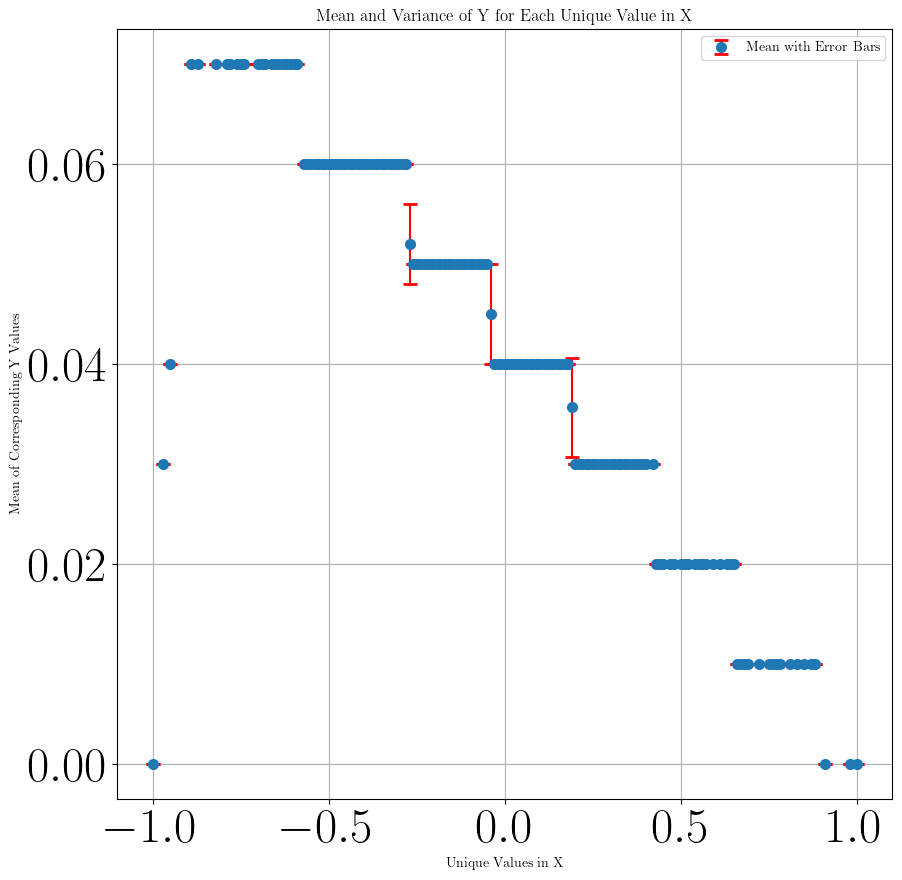

In [270]:
X = a_train
Y = z_train

X = np.array(X).round(2)
Y = np.array(Y).round(2)

unique_values = np.unique(X)

# Calculate mean and variance of Y for each unique value in X
means = []
variances = []
for value in unique_values:
    indices = np.where(X == value)
    y_values = Y[indices]
    means.append(np.mean(y_values))
    variances.append(np.var(y_values))

# Convert to numpy arrays for plotting
means = np.array(means)
variances = np.array(variances)
errors = np.sqrt(variances)  # Standard deviation for error bars

# Plotting the results
plt.figure(figsize=(10, 10))
plt.errorbar(unique_values, means, yerr=errors, fmt='o', ecolor='r', capsize=5, capthick=2,  mew=2, label='Mean with Error Bars')
plt.xlabel('Unique Values in X')
plt.ylabel('Mean of Corresponding Y Values')
plt.title('Mean and Variance of Y for Each Unique Value in X')
plt.legend()
plt.grid(True)
plt.show()

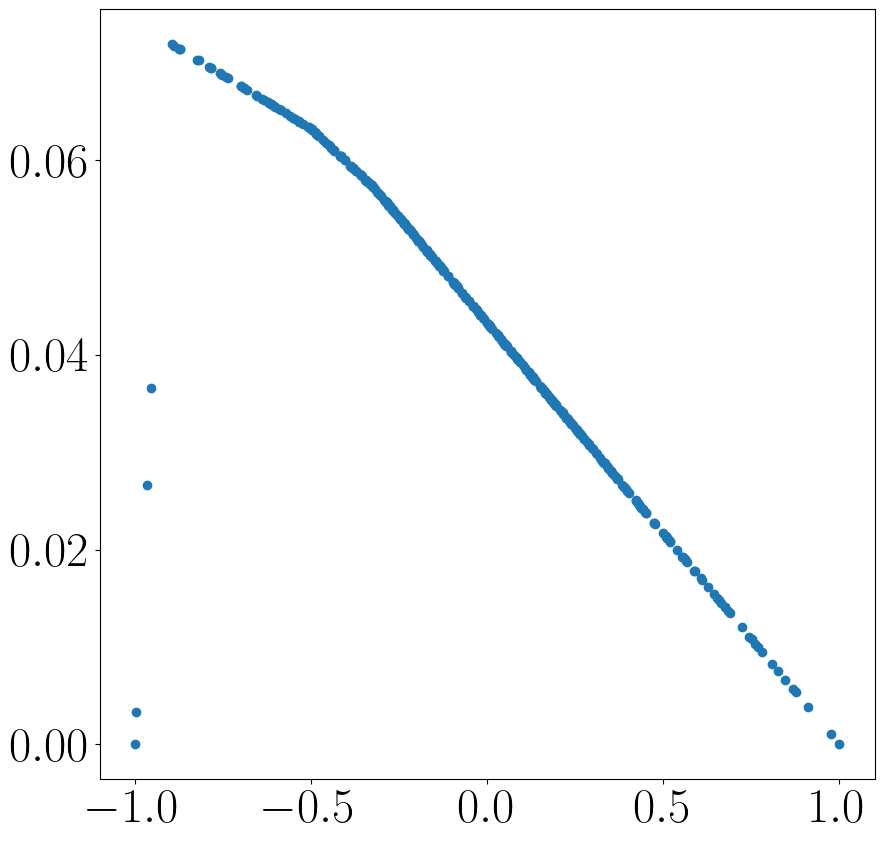

In [272]:
X = a_train
Y = z_train


plt.figure(figsize=(10, 10))
plt.plot(X, Y, 'o', label='Data Points')
plt.show()

In [282]:
def normalize(z, a):
    mz = np.mean(z)
    ma = np.mean(a)

    mz = np.min(z)
    ma = np.min(a)

    max_z = np.max(z)
    max_a = np.max(a)

    m = (max_a - ma)/(max_z - mz)
    n = ma - m*mz

    return m*z #+ n
def normalize_1_0(z):

    max_z = np.max(z)
    mz = np.min(z)
    

    m = (2)/(max_z - mz)

    b = 1 - m*max_z

    return m*z + b

def moving_average(signal, window_size):
    window = np.ones(window_size) / window_size
    return np.convolve(signal, window, mode='same')




t,a = genData.generateDynamics(max=1, min=0, dt = 0.1)

t = t[:-40]
a = a[:-40]
a = normalize_1_0(a)

n_samples = t.shape[0]
t_train = t[:int(n_samples*0.8)]
t_test = t[int(n_samples*0.8):]

a_train = a[:int(n_samples*0.8)]
a_test = a[int(n_samples*0.8):]

X = []

colors = ['b', 'orange', 'red', 'darkgreen', 'm', 'y', 'k', '#FFA500', '#800080', '#008080']
#colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf']
indx_color = 1
for dyn_type in ["Motion","Scale","Intensity"]:
#for dyn_type in ["Intensity"]:
    if dyn_type == "Motion":
        data_folder = np.load('Data/dataset_motion.npy')
        model = latentEncoder_m
    if dyn_type == "Scale":
        data_folder = np.load('Data/dataset_Scale_nu.npy')
        model = latentEncoder_s
    if dyn_type == "Intensity":
        model = latentEncoder_I
        data_folder = np.load('Data/dataset_intensity.npy')

    data_train = data_folder
    dt = 0.2
    dataloader  = loader.getLoader_folder(data_train, split=False)

    z = None

    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)


    for data in dataloader:

        input_Data, out_Data = data

        x0 = input_Data

        x0 = x0.to(device=device, dtype=torch.float)

        x2 = out_Data.to(device=device, dtype=torch.float)

        outputs = model(x0)
        z2_encoder, z2_phys=outputs

        if z is None:
            z = z2_encoder.detach().cpu().numpy()[0][0]
        else:
            z = np.vstack((z,z2_encoder.detach().cpu().numpy()[0][0]))

    z = normalize_1_0(z)
    if z[0] < 0:
        z = -z
        
    z = z.reshape(-1)

    z_train = z[:int(n_samples*0.8)]
    z_test = z[int(n_samples*0.8):]

    coefficients = np.polyfit(a_train, z_train, 1)
    slope, intercept = coefficients

    # Calculate predicted Y values
    z_train_l = slope * a_train + intercept

    coefficients = np.polyfit(a_test, z_test, 1)
    slope, intercept = coefficients
    z_test_l = slope * a_test + intercept


    X.append( { 'x': a_train, 'y': z_train, 'label': '_nolegend_' , 'alpha':0.3, 'linewidth' :2.0, 'color':colors[indx_color], 'plot_type':'scatter'  } )
    #X.append( { 'x': a_test, 'y': z_test, 'label': '_nolegend_' , 'alpha':0.3, 'linewidth' :2.0 , 'linestyle': '--', 'color':colors[indx_color] , 'plot_type':'scatter'   } )
    X.append( { 'x': a_train, 'y': z_train_l, 'label': dyn_type , 'alpha':1.0, 'linewidth' :2.5, 'color':colors[indx_color]  } )
    #X.append( { 'x': a_test, 'y': z_test_l, 'label': '_nolegend_' , 'alpha':1.0, 'linewidth' :2.5 , 'linestyle': '--', 'color':colors[indx_color]   } )


    

 
    indx_color += 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

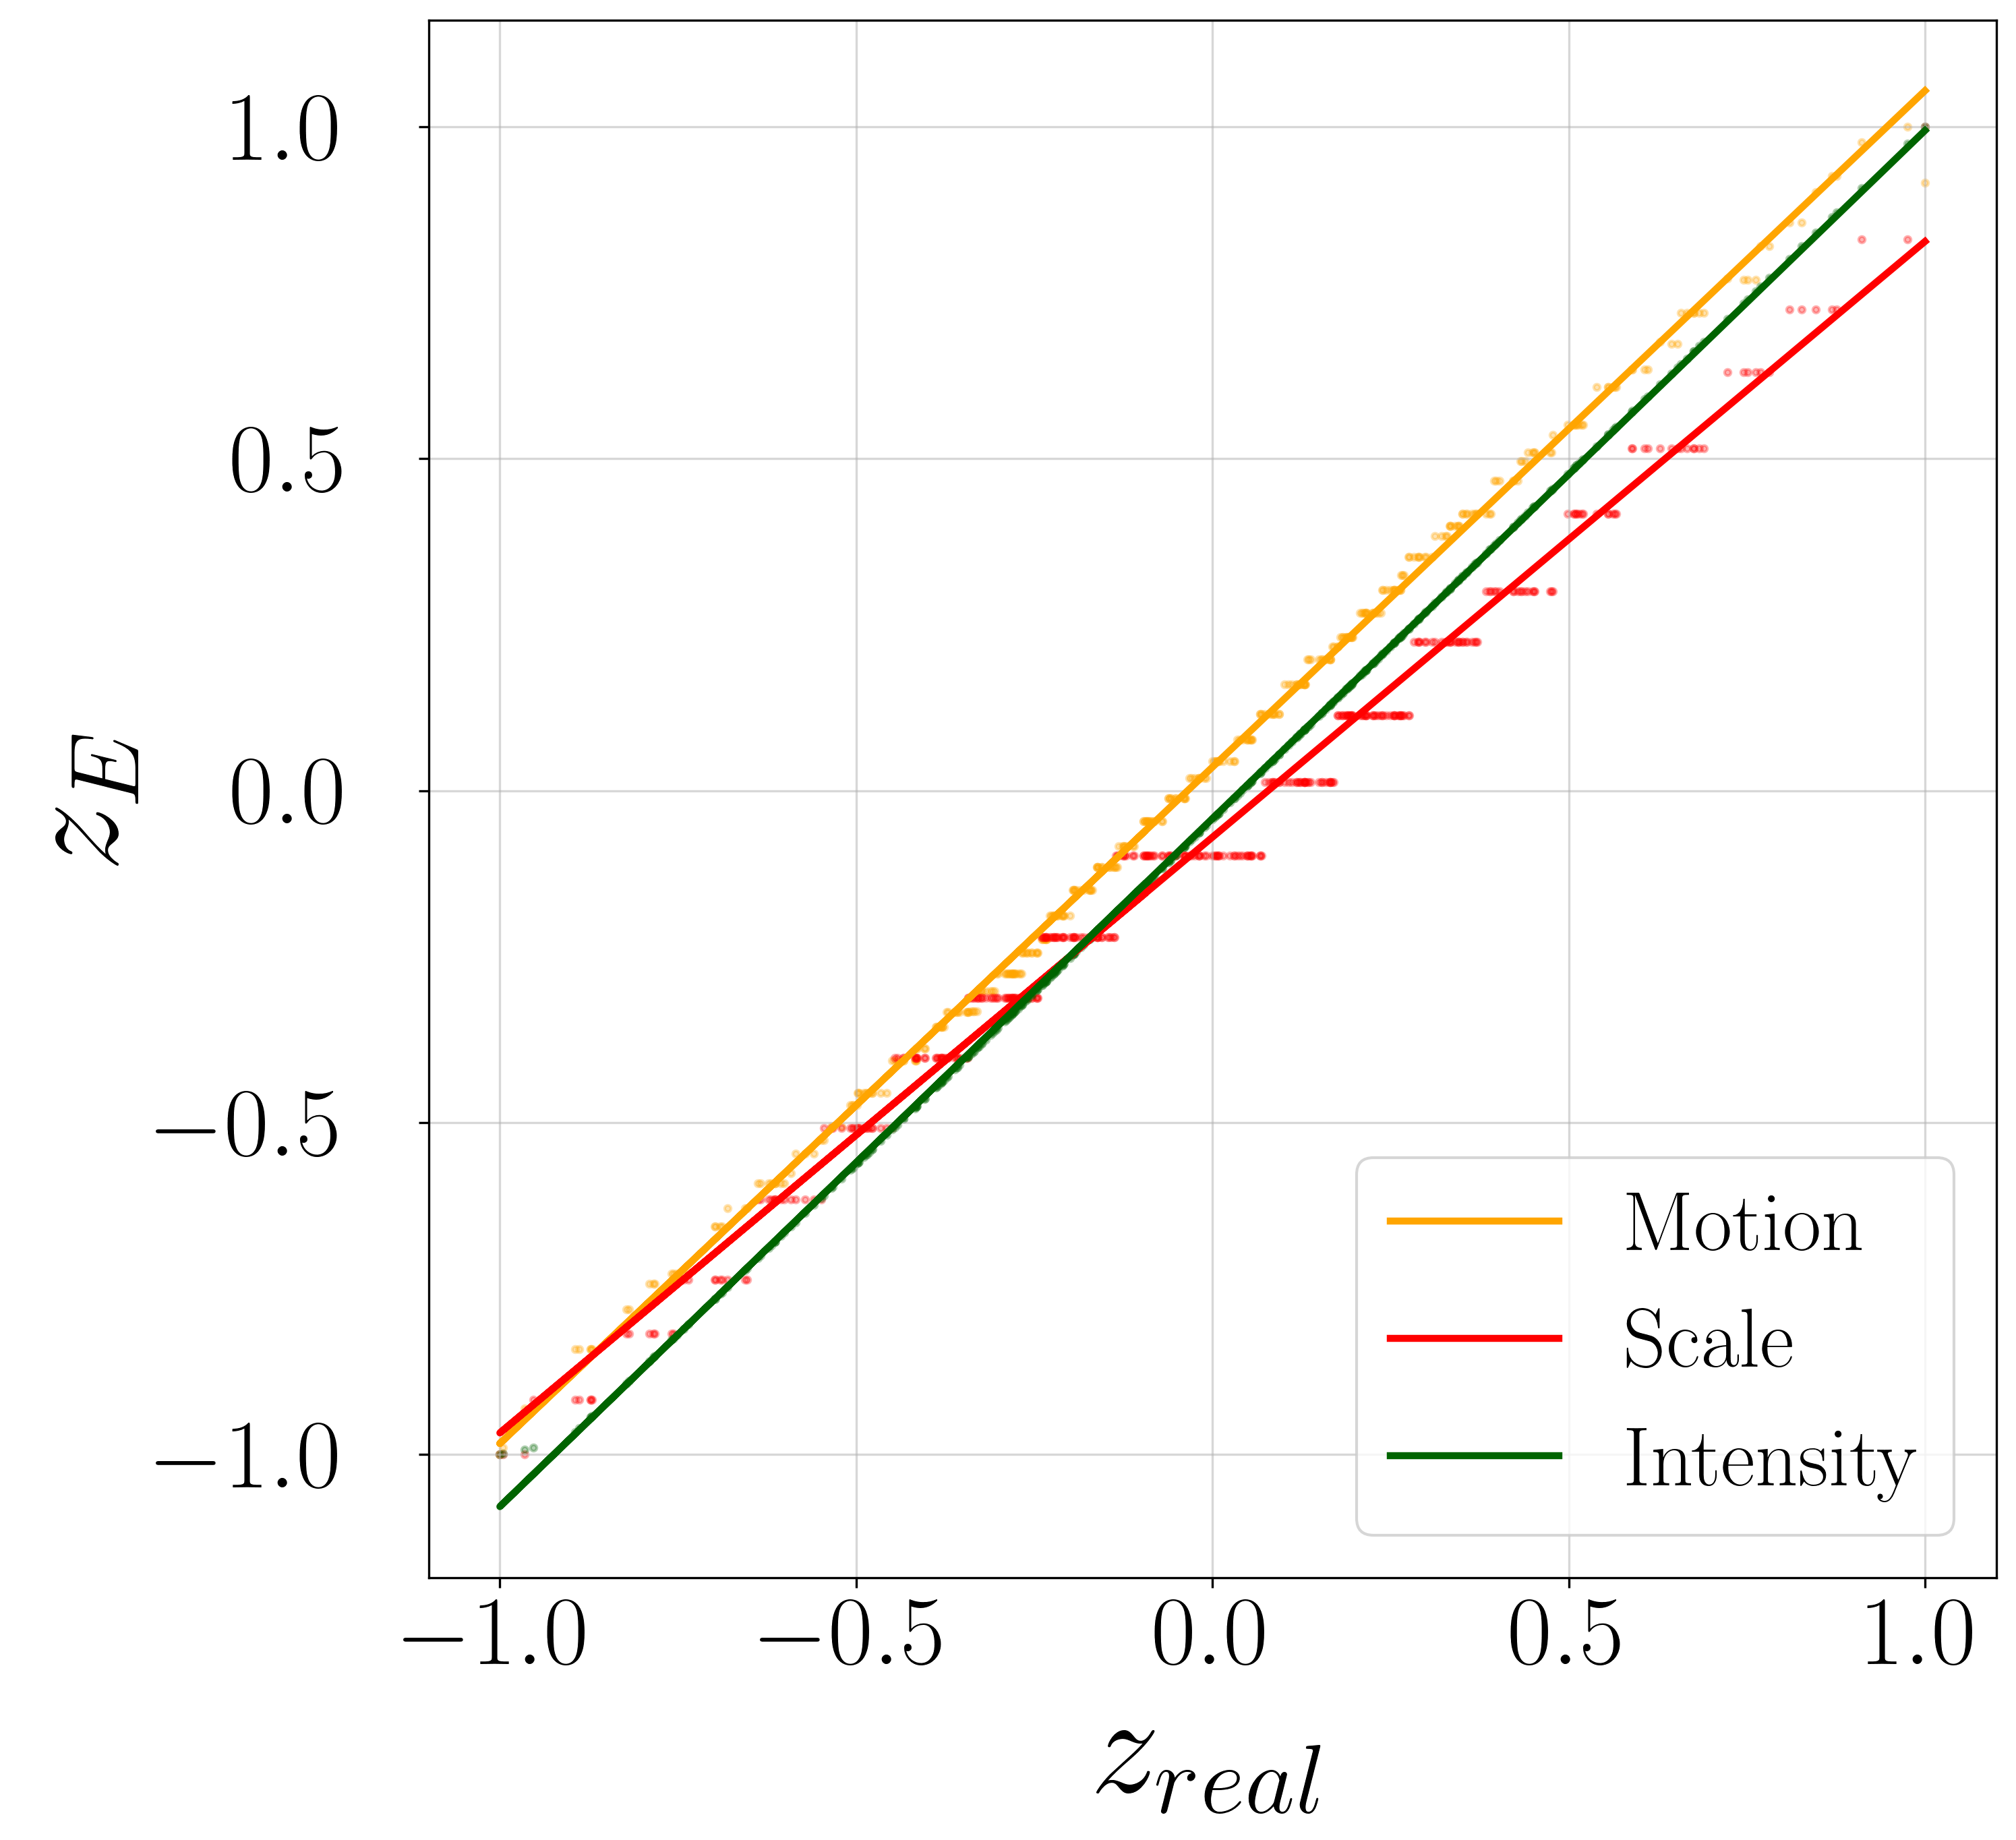

In [289]:
cp.plotMultiple( X,  'time(s)', 'value','error Latent Space', 'errLatenSpacePred', styleDark = False, show  = True )

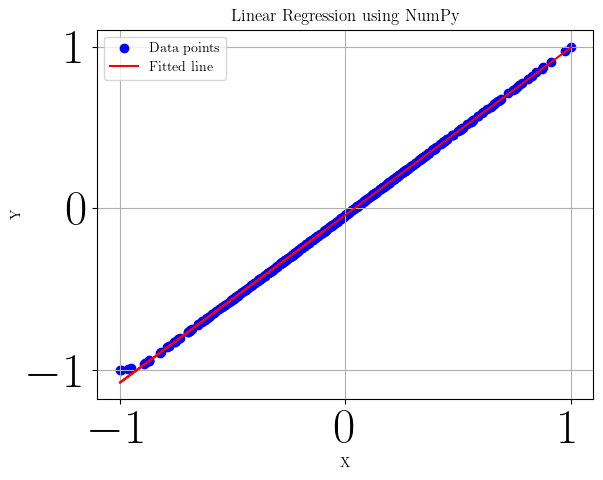

In [274]:
X = a_train
Y = z_train

# Perform linear regression using NumPy's polyfit
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

# Calculate predicted Y values
Y_pred = slope * X + intercept

# Plot the data and the fitted line
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_pred, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression using NumPy')
plt.grid(True)
plt.show()

### MM

Dynamics type:  Intensity
Initial value:  -10.0
Using device: cuda
Initial Loss 	 training loss: 1.8325018882751465 	 validation loss: 3.0179691314697266
best model a 3.8171298503875732
best last a 3.8615288734436035
best model b 0.08927842974662781
best last b 0.08442231267690659
Best gamma1:  3.8615288734436035
Best gamma2:  0.08442231267690659
Initial value:  -5.0
Using device: cuda
Initial Loss 	 training loss: 1.4464941322803497 	 validation loss: 2.5923047065734863
best model a 3.8955094814300537
best last a 3.883559226989746
best model b 0.0979703739285469
best last b 0.10357295721769333
Best gamma1:  3.883559226989746
Best gamma2:  0.10357295721769333
Initial value:  -1.0
Using device: cuda
Initial Loss 	 training loss: 1.515847533941269 	 validation loss: 2.7007572650909424
best model a 3.9122071266174316
best last a 3.8782708644866943
best model b 0.07992973178625107
best last b 0.08363915979862213
Best gamma1:  3.8782708644866943
Best gamma2:  0.08363915979862213
Initial val

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

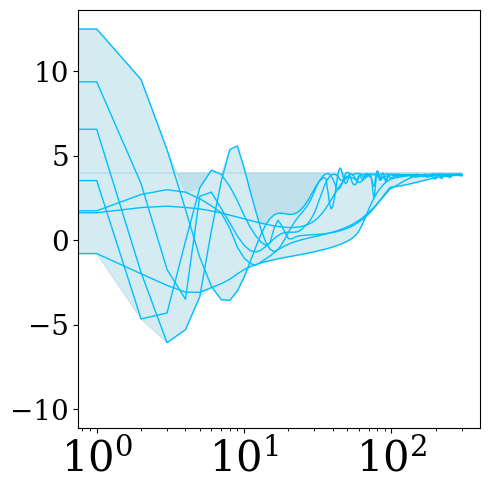

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


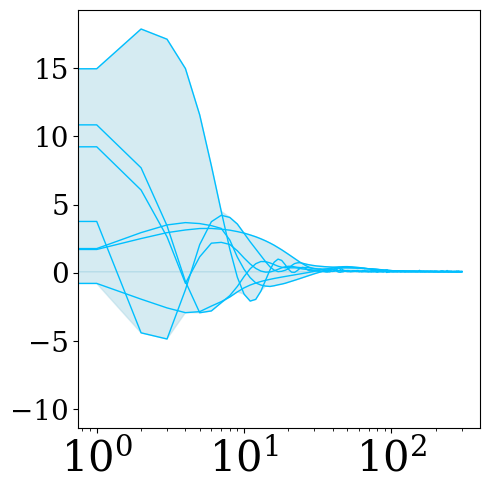

Best gamma1:  3.8766719613756453 \pm 0.022436358597632097
Best gamma2:  0.08690039600644793 \pm 0.007245389360185002


In [337]:
#for dyn_type in ["Motion","Scale","Intensity"]:
for dyn_type in ["Intensity"]:
    print("Dynamics type: ", dyn_type)

    if dyn_type == "Motion":
        data_folder = np.load('Data/dataset_motion.npy')
    if dyn_type == "Scale":
        data_folder = np.load('Data/dataset_Scale_nu.npy')
    if dyn_type == "Intensity":
        data_folder = np.load('Data/dataset_intensity.npy')

    data_train = data_folder
    dt = 0.2
    train_dataloader, test_dataloader, train_x, val_x  = loader.getLoader_folder(data_train, split=True)


    a = []
    b = []

    gamma1 = []	
    gamma2 = []

    plt.figure()


    for inits in [ -10.0, -5.0, -1.0,0.0, 1.0, 5.0, 10.0]:

        print("Initial value: ", inits)

        latentEncoder = mainmodel.EndPhys(dt = dt,  
                            pmodel = "Damped_oscillation",
                            init_phys = inits, 
                            initw=True)

        latentEncoder, log  = train.train(latentEncoder, 
                                        train_dataloader, 
                                        test_dataloader,
                                        init_phys = inits,                                 
                                        loss_name='latent_loss')
        
        gamma1.append(latentEncoder.pModel.alpha[0].detach().cpu().numpy().item())
        gamma2.append(latentEncoder.pModel.beta[0].detach().cpu().numpy().item())

        print("Best gamma1: ", latentEncoder.pModel.alpha[0].detach().cpu().numpy().item())
        print("Best gamma2: ", latentEncoder.pModel.beta[0].detach().cpu().numpy().item())
        
        a.append( [element["alpha"] for element in log  ])
        b.append( [element["beta"] for element in log  ] )

    a = np.array(a)
    b = np.array(b)
    cp.plotAreas(a, 3.99, dyn_type+"_gamma1")
    cp.plotAreas(b, 0.08, dyn_type+"_gamma2")

    gamma1 = np.array(gamma1)
    gamma2 = np.array(gamma2)

    print("Best gamma1: ", gamma1.mean() , "\pm", gamma1.std())
    print("Best gamma2: ", gamma2.mean() , "\pm", gamma2.std())

In [325]:
gamma1 = gamma1[gamma1 != 0.0]
gamma2 = gamma2[gamma2 != 0.0]
print(gamma1)
print(gamma2)

gamma1 = np.array(gamma1)
gamma2 = np.array(gamma2)

print("Best gamma1: ", gamma1.mean() , "\pm", gamma1.std())
print("Best gamma2: ", gamma2.mean() , "\pm", gamma2.std())

[3.95210648 3.94166565 3.93867278 3.95041895 3.93446565 3.95559692
 3.93336344]
[0.14233992 0.15430722 0.13811378 0.15380447 0.14218201 0.14739411
 0.13099484]
Best gamma1:  3.9437556947980608 \pm 0.008270925936692049
Best gamma2:  0.14416233343737467 \pm 0.007778582753766319


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


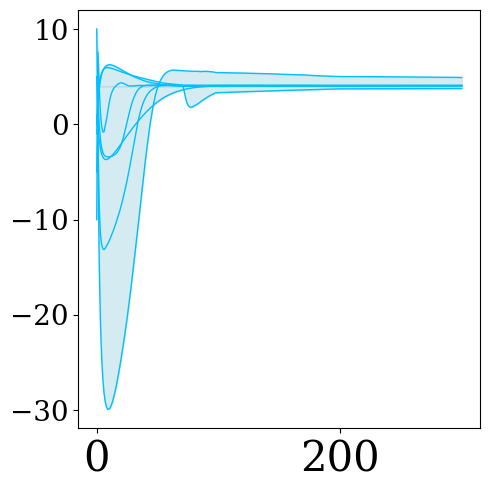

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


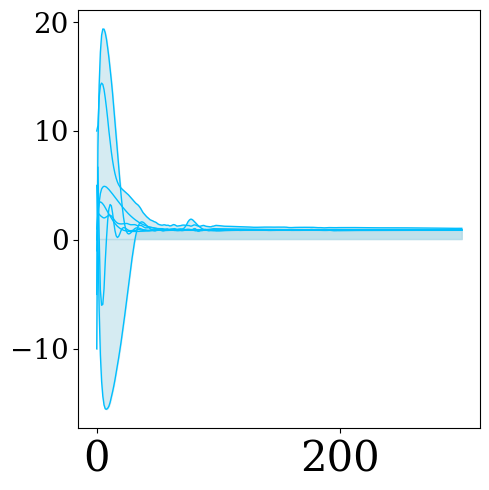

In [335]:
cp.plotAreas(a, 3.99, dyn_type+"_gamma1")
cp.plotAreas(b, 0.08, dyn_type+"_gamma2")

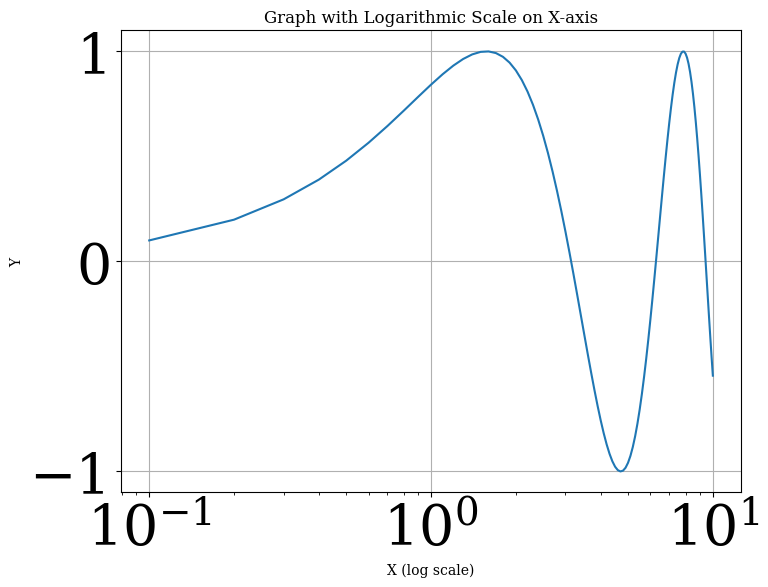

In [300]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
x = np.linspace(0.1, 10, 100)
y = np.sin(x)

# Plot the graph with log scale on the x-axis
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xscale('log')  # Set logarithmic scale for x-axis
plt.xlabel('X (log scale)')
plt.ylabel('Y')
plt.title('Graph with Logarithmic Scale on X-axis')
plt.grid(True)
plt.show()

In [308]:
print(a[0][0])
print(b[0][0])

-10.0
-10.0


### first order exp

In [73]:
data_folder = np.load('Data/dataset_intensity_1storder_low.npy')

data_train = data_folder

(42, 4, 1, 50, 50)


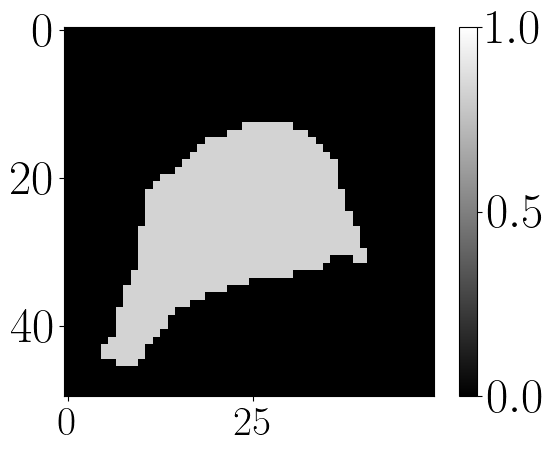

1.0
torch.Size([42, 4, 1, 50, 50])
tensor(1.)


In [75]:
print(data_train.shape)
img = data_train[0,3,0]
plt.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.colorbar()
plt.show()

print(data_train.max())

img_torch = torch.from_numpy(data_train).float()
print(img_torch.shape)
print(img_torch.max())

In [82]:
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:2000"
torch.cuda.empty_cache() 
torch.manual_seed(42)

for dyn_type in ["intensity"]:
    print("Dynamics type: ", dyn_type)

    
    data_folder = np.load('Data/dataset_'+dyn_type+'_1storder_low.npy')

    data_train = data_folder
    dt = 0.04
    train_dataloader, test_dataloader, train_x, val_x  = loader.getLoader_folder(data_train, split=True)


    a = []
    b = []

    gamma1 = []	
    gamma2 = []

    plt.figure()


    for inits in [ -1.0, 0.0, 1.0]:

        print("Initial value: ", inits)

        latentEncoder = mainmodel.EndPhys(dt = dt,  
                            pmodel = "dyn_1storder",
                            init_phys = inits, 
                            initw=True)

        latentEncoder, log  = train.train(latentEncoder, 
                                        train_dataloader, 
                                        test_dataloader,
                                        init_phys = inits,                                 
                                        loss_name='latent_loss')
        
        #gamma1.append(params[0])
        #gamma2.append(params[1])

        gamma1.append(latentEncoder.pModel.alpha[0].detach().cpu().numpy().item())
        gamma2.append(latentEncoder.pModel.beta[0].detach().cpu().numpy().item())

        #print("Best gamma1: ", latentEncoder.pModel.alpha[0].detach().cpu().numpy().item())
        #print("Best gamma2: ", latentEncoder.pModel.beta[0].detach().cpu().numpy().item())
        
        a.append( [element["alpha"] for element in log  ])
        b.append( [element["beta"] for element in log  ] )

    gamma1 = np.array(gamma1)
    gamma2 = np.array(gamma2)

    print("Best gamma1: ", gamma1.mean() , "\pm", gamma1.std())
    print("Best gamma2: ", gamma2.mean() , "\pm", gamma2.std())

Dynamics type:  intensity
Initial value:  -1.0
Using device: cuda


Initial Loss 	 training loss: 4.448263645172119 	 validation loss: 6.088177680969238
epoch: 25 	 training loss: 14.815539360046387 	 validation loss: 4.314483642578125
epoch: 50 	 training loss: 1.1777194738388062 	 validation loss: 2.9215097427368164
epoch: 75 	 training loss: 0.8119407892227173 	 validation loss: 2.571686029434204
epoch: 100 	 training loss: 0.3433157205581665 	 validation loss: 5.60415506362915
epoch: 125 	 training loss: 1.4112476110458374 	 validation loss: 7.348330020904541
epoch: 150 	 training loss: 0.42110228538513184 	 validation loss: 4.1330461502075195
epoch: 175 	 training loss: 0.26211825013160706 	 validation loss: 5.066928863525391
epoch: 200 	 training loss: 0.19268998503684998 	 validation loss: 7.055461883544922
epoch: 225 	 training loss: 0.1638372838497162 	 validation loss: 7.2498040199279785
epoch: 250 	 training loss: 0.14851102232933044 	 validation loss: 7.541920185089111


best model a 1.8220150470733643
best last a 3.4355669021606445
best model b -1.0
best last b -1.0
Initial value:  0.0
Using device: cuda


Initial Loss 	 training loss: 4.072464942932129 	 validation loss: 6.289535045623779
epoch: 25 	 training loss: 1.3327412605285645 	 validation loss: 2.9823601245880127
epoch: 50 	 training loss: 1.1673420667648315 	 validation loss: 2.8402068614959717
epoch: 75 	 training loss: 0.974336564540863 	 validation loss: 2.6093175411224365
epoch: 100 	 training loss: 0.686150848865509 	 validation loss: 2.405975103378296
epoch: 125 	 training loss: 0.4080478250980377 	 validation loss: 1.5845019817352295
epoch: 150 	 training loss: 0.3383755683898926 	 validation loss: 2.09588623046875
epoch: 175 	 training loss: 0.18161243200302124 	 validation loss: 2.339197874069214
epoch: 200 	 training loss: 0.1570112407207489 	 validation loss: 2.4792819023132324
epoch: 225 	 training loss: 0.213668093085289 	 validation loss: 2.8277111053466797
epoch: 250 	 training loss: 0.1602880358695984 	 validation loss: 2.4345991611480713


best model a 3.3973538875579834
best last a 3.7930691242218018
best model b 0.0
best last b 0.0
Initial value:  1.0
Using device: cuda


Initial Loss 	 training loss: 4.886150360107422 	 validation loss: 6.794620990753174
epoch: 25 	 training loss: 2.2597856521606445 	 validation loss: 2.927724838256836
epoch: 50 	 training loss: 1.4781100749969482 	 validation loss: 2.996675491333008
epoch: 75 	 training loss: 1.3461257219314575 	 validation loss: 2.9798812866210938
epoch: 100 	 training loss: 1.2402230501174927 	 validation loss: 2.8581249713897705
epoch: 125 	 training loss: 1.1354899406433105 	 validation loss: 2.7558248043060303
epoch: 150 	 training loss: 1.032075047492981 	 validation loss: 2.6634674072265625
epoch: 175 	 training loss: 0.9307195544242859 	 validation loss: 2.5783164501190186
epoch: 200 	 training loss: 0.83116614818573 	 validation loss: 2.4974539279937744
epoch: 225 	 training loss: 0.732446014881134 	 validation loss: 2.424745798110962
epoch: 250 	 training loss: 0.6332607269287109 	 validation loss: 2.357074022293091


best model a 2.5029704570770264
best last a 2.5029704570770264
best model b 1.0
best last b 1.0
Best gamma1:  3.243868827819824 \pm 0.5438441912421029
Best gamma2:  0.0 \pm 0.816496580927726


<Figure size 640x480 with 0 Axes>

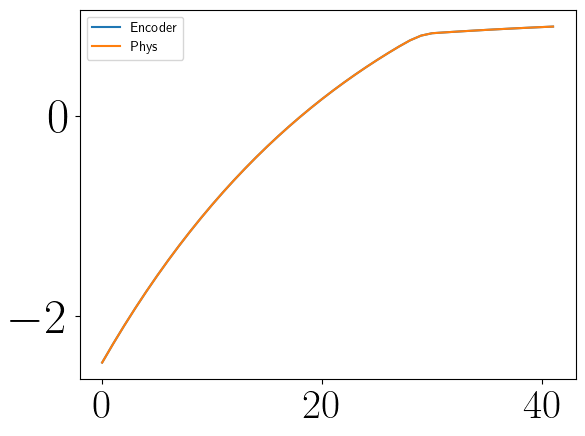

In [81]:
visual_loader  = loader.getLoader_folder(data_train, split=False)




z = None

device = "cuda" if torch.cuda.is_available() else "cpu"
#model.to(device)

z2_encoder_list = []
z2_phys_list = []


for data in visual_loader:

    input_Data, out_Data = data

    x0 = input_Data

    x0 = x0.to(device=device, dtype=torch.float)

    x2 = out_Data.to(device=device, dtype=torch.float)

    outputs = latentEncoder(x0)
    z2_encoder, z2_phys,_=outputs

    z2_encoder_list.append(z2_encoder.detach().cpu().numpy()[0][0])
    z2_phys_list.append(z2_phys.detach().cpu().numpy()[0][0])

z2_encoder_list = np.array(z2_encoder_list)
z2_phys_list = np.array(z2_phys_list)

z2_encoder_list = z2_encoder_list.reshape(-1)
z2_phys_list = z2_phys_list.reshape(-1)

plt.figure()
plt.plot(z2_encoder_list, label = "Encoder")
plt.plot(z2_phys_list, label = "Phys")
plt.legend()
plt.show()

### baseline comparition

In [35]:
torch.cuda.empty_cache() 
torch.manual_seed(42)

data_folder = np.load('Data/color_mnist.npz')
data_train = data_folder['train_x']
data_train[data_train < 205 ] = 0
data_train= data_train[0:1000,:,:,:,0:2]
data_train = data_train/255
print(data_train.max())
print(data_train.shape) 
#
#data_train = new_data

#data_train = data_merge_mask

dt = 0.3
train_dataloader, test_dataloader, train_x, val_x  = loader.getLoader_folder(data_train, split=True)
latentEncoder = mainmodel.EndPhysMultiple(dt = dt, 
                                          in_size=64, 
                                          n_mask = 2, 
                                          in_channels = 2, 
                                          latent_dim=2, 
                                          pmodel = "ODE_2ObjectsSpring", 
                                          init_phys = [10.0,1.0], initw=False)
latentEncoder, log  = train.train_m(latentEncoder, 
                                            train_dataloader, 
                                            test_dataloader,     
                                            init_phys=2.0 ,                           
                                            loss_name='latent_loss_multiple')




0.996078431372549
(1000, 12, 64, 64, 2)
Using device: cuda


Initial Loss 	 training loss: 29.417201555692234 	 validation loss: 29.40202760696411
epoch: 10 	 training loss: 0.575204305923902 	 validation loss: 0.8306232988834381
epoch: 20 	 training loss: 0.25015393701883465 	 validation loss: 0.5794979631900787
epoch: 30 	 training loss: 0.3250592052936554 	 validation loss: 0.653810977935791
epoch: 40 	 training loss: 0.24404698037184203 	 validation loss: 0.49713169038295746
epoch: 50 	 training loss: 0.2223519212924517 	 validation loss: 0.50523641705513
epoch: 60 	 training loss: 0.19835209961120898 	 validation loss: 0.46331357955932617
epoch: 70 	 training loss: 0.20322989500485933 	 validation loss: 0.512122817337513
epoch: 80 	 training loss: 0.1932481825351715 	 validation loss: 0.4365239366889
epoch: 90 	 training loss: 0.22363902513797468 	 validation loss: 0.49365542083978653
loss tensor(0.0289, device='cuda:0', grad_fn=<AddBackward0>)
KLD_4d tensor(0.0765, device='cuda:0', grad_fn=<MulBackward0>)
KLD_2d tensor(0.7547, device='cuda

best model a 2.0172390937805176
best last a 2.0453126430511475
best model b 1.0525096654891968
best last b 1.0302318334579468


In [38]:
k = []
eq = []
k.append( [element["k"] for element in log  ])
eq.append( [element["eq_distance"] for element in log  ] )

#file_path = 'k_ours_10.txt'

# Write the list to a file
with open(file_path, 'w') as file:
    for value in k[0]:
        file.write(f"{value}\n")

#file_path = 'eq_ours_10.txt'

# Write the list to a file
with open(file_path, 'w') as file:
    for value in eq[0]:
        file.write(f"{value}\n")

C:\Users\aleja\AppData\Local\Temp\ipykernel_1952\1620235863.py:57: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x0000018BDEC05510> starts with '_'. It is thus excluded from the legend.
  first_legend = ax.legend(handles=lines[:-2], fontsize="22", loc ="lower center")
C:\Users\aleja\AppData\Local\Temp\ipykernel_1952\1620235863.py:57: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x0000018BD6A67AC0> starts with '_'. It is thus excluded from the legend.
  first_legend = ax.legend(handles=lines[:-2], fontsize="22", loc ="lower center")
C:\Users\aleja\AppData\Local\Temp\ipykernel_1952\1620235863.py:57: UserWarning: The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x0000018BD6A66860> starts with '_'. It is thus excluded from the legend.
  first_legend = ax.legend(handles=lines[:-2], fontsize="22", loc ="lower center")
The PostScript backend does not support transparency; partially transparent artists will be rendered opaqu

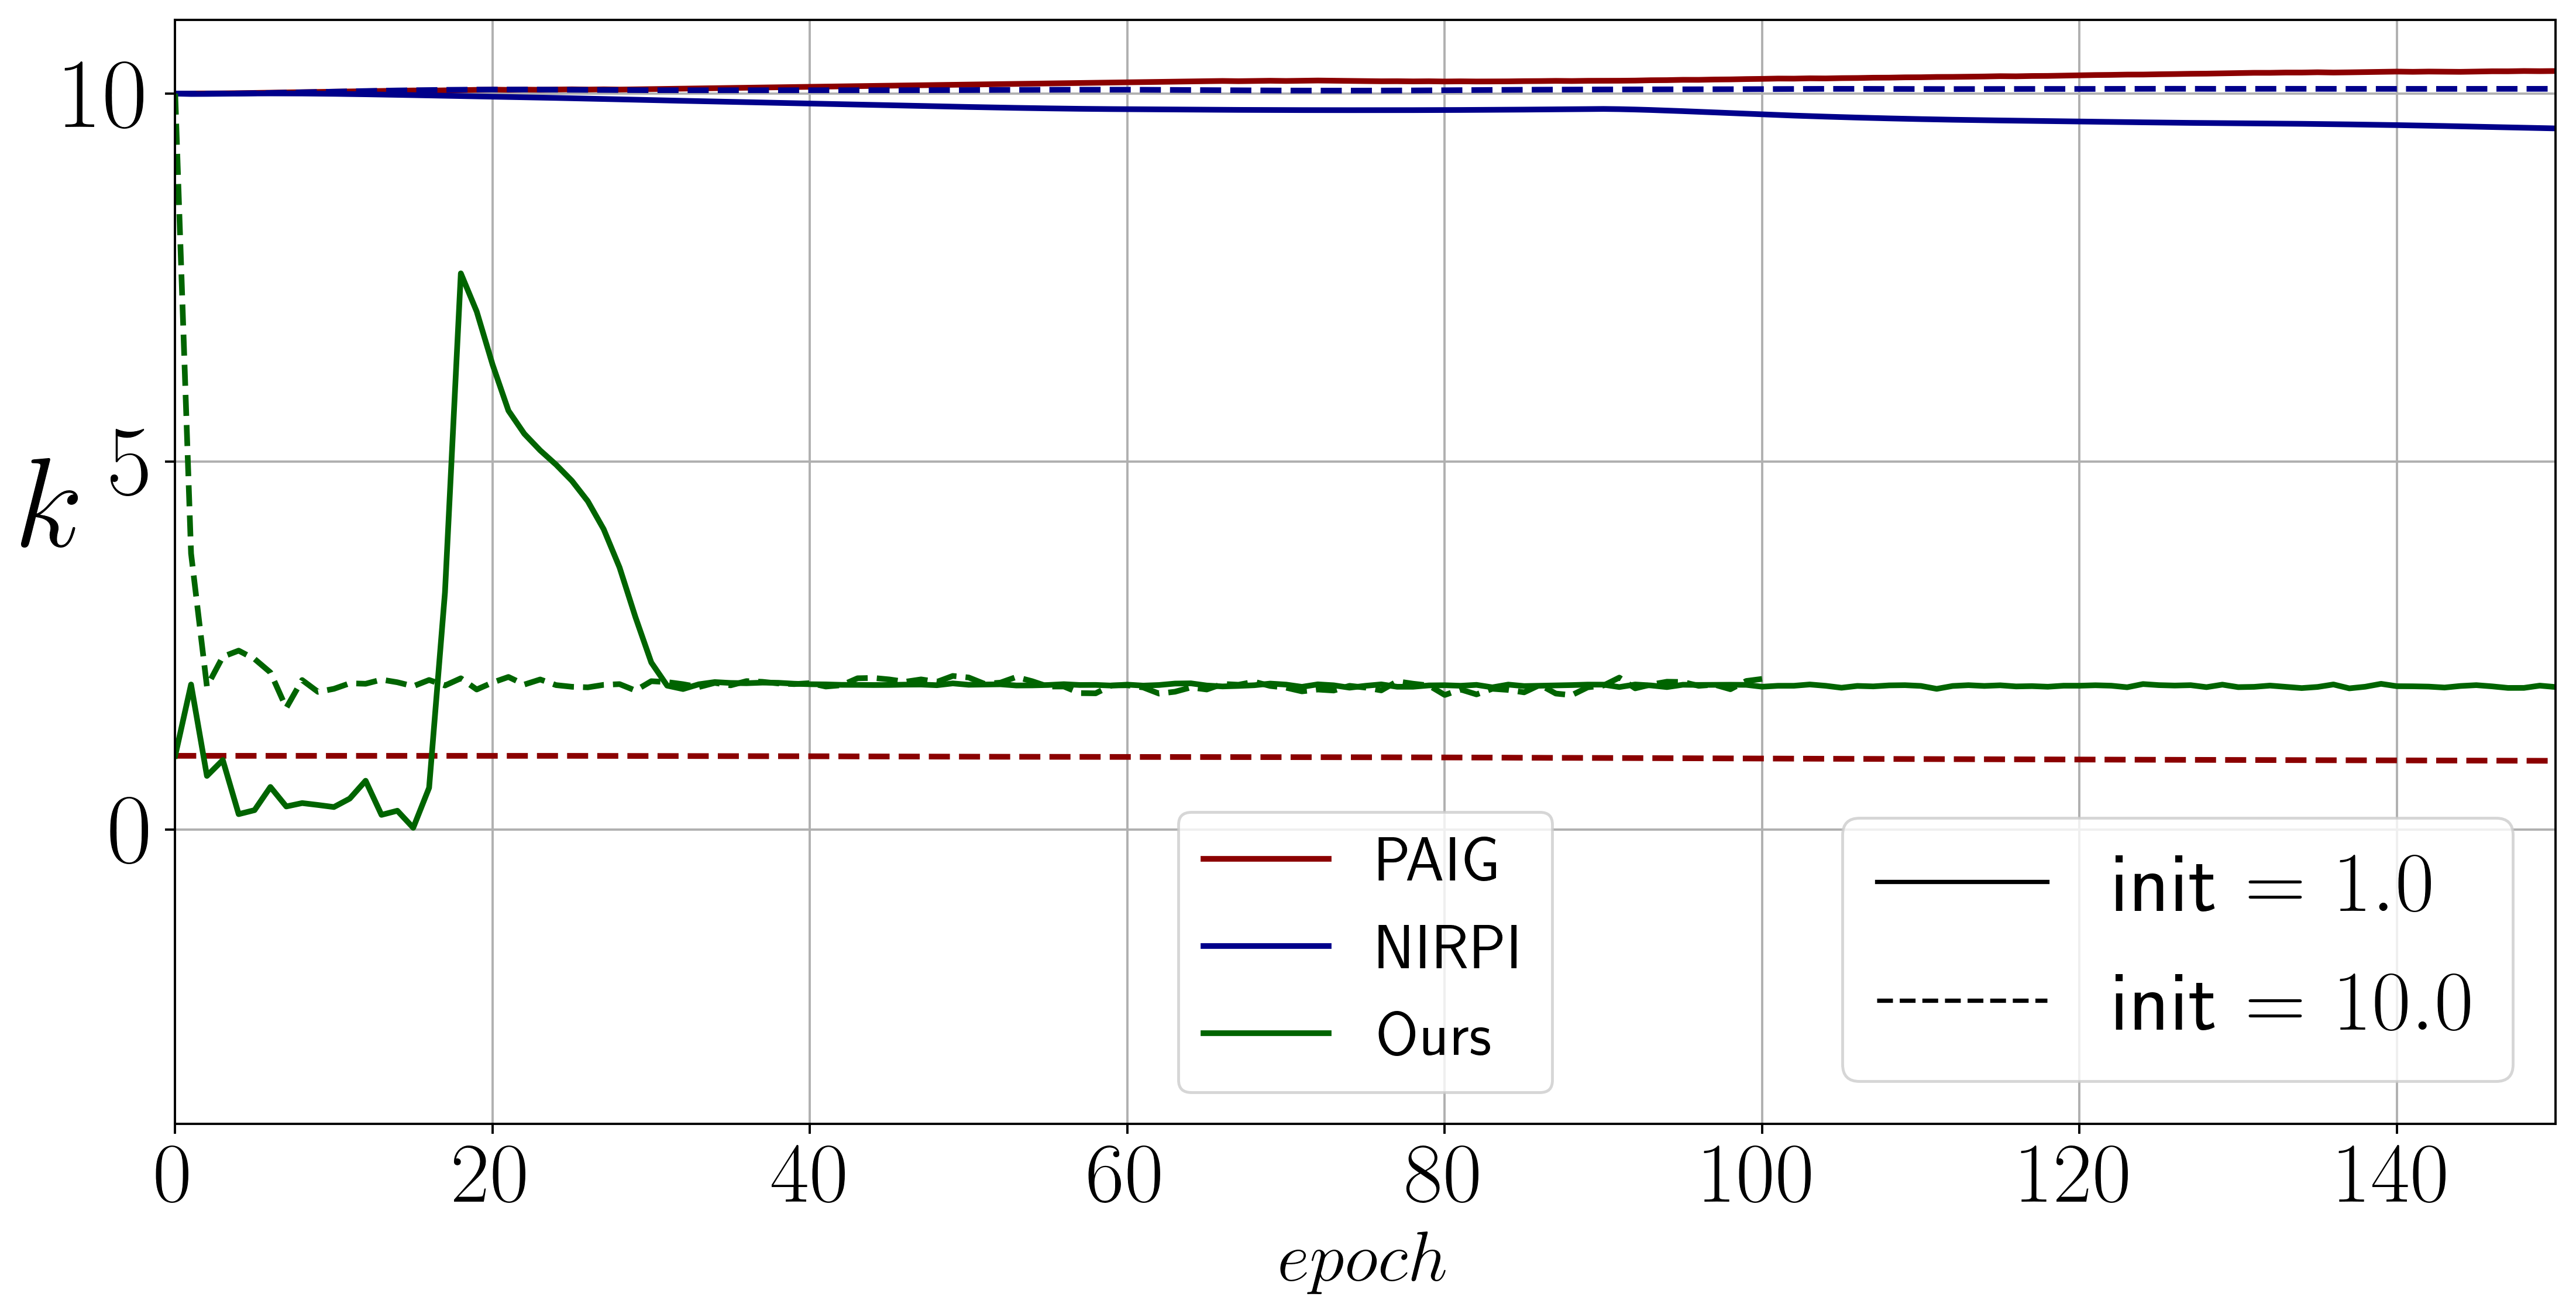

In [83]:
import matplotlib.pyplot as plt

# Function to read values from a text file
def read_values_from_file(file_path):
    with open(file_path, 'r') as file:
        values = file.readlines()
    # Convert each value to a float and return a list of values
    return [float(value.strip()) for value in values]

# Read values from the two text files
baseLine1_1 = read_values_from_file('log_k (1).txt')
baseLine1_10 = read_values_from_file('log_k.txt')

baseLine2_1 = read_values_from_file('neural_k_1.txt')
baseLine2_10 = read_values_from_file('neural_k_10.txt')

ours_1 = read_values_from_file('k_ours.txt')
ours_10 = read_values_from_file('k_ours_10.txt')

baseLine1_1 = np.exp(np.array(baseLine1_1))
baseLine1_10 = np.exp(np.array(baseLine1_10))

baseLine2_1 = np.array(baseLine2_1)
baseLine2_10 = np.array(baseLine2_10)

ours_1 = np.array(ours_1)
ours_10 = np.array(ours_10)

# Plot the values
fig, ax =plt.subplots(figsize=(15, 7), dpi=350	)
plt.plot(baseLine1_1, label=r'PAIG', color='darkred', linewidth=2)
plt.plot(baseLine1_10, label='_nolegend_', color='darkred', linestyle='--', linewidth=2)
plt.plot(baseLine2_1, label=r'NIRPI', color='darkblue', linewidth=2)
plt.plot(baseLine2_10, label='_nolegend_', color='darkblue', linestyle='--', linewidth=2)

plt.plot(ours_1, label=r'Ours', color='darkgreen', linewidth=2)
plt.plot(ours_10, label='_nolegend_', color='darkgreen', linestyle='--', linewidth=2)

#plt.xscale('log')
#plt.yscale('log')

plt.xlim(0, 150)

plt.ylim(-4, 11)
plt.rcParams['text.usetex'] = True
plt.xlabel(r'$epoch$',size=25)
plt.ylabel(r'$k$',size=45, rotation=0)

plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=35)
plt.tick_params(axis='y', which='major')#, pad=25)

aa, = plt.plot(0,0, color='k', label=r'init = $1.0$')
aa1, =plt.plot(0,0, color='k', linestyle = '--', label=r'init = $10.0$')
lines = ax.get_lines()

first_legend = ax.legend(handles=lines[:-2], fontsize="22", loc ="lower center")
ax.add_artist(first_legend)
second_legend= plt.legend(handles=lines[-2:], fontsize="30", loc ="lower right")

#plt.legend()
plt.grid(True)
folder = "./Figures/figs_init"
name = "k_comparison"
name_plot = folder+"/"+name+".png"
name_plot_eps = folder+"/"+name+".eps"
plt.savefig(name_plot, dpi=300, transparent=True,bbox_inches='tight')
plt.savefig(name_plot_eps, format='eps')

plt.show()

### Chaos

In [85]:
data_folder = np.load('Data/dataset_chaos2.npy')

data_train = data_folder
dt = 1
train_dataloader, test_dataloader, train_x, val_x  = loader.getLoader_folder(data_train, split=True)


latentEncoder = mainmodel.EndPhys(dt = dt,  
                            pmodel = "Clifford_Attractor",
                            latent_dim=2,
                            init_phys = inits, 
                            initw=True)

latentEncoder, log  = train.train(latentEncoder, 
                                train_dataloader, 
                                test_dataloader,
                                init_phys = 1.5,                                 
                                loss_name='latent_loss')

Using device: cuda


Initial Loss 	 training loss: 10.004233741760254 	 validation loss: 10.633880615234375
epoch: 10 	 training loss: 0.7392917037010193 	 validation loss: 1.49638831615448
epoch: 20 	 training loss: 0.8172972798347473 	 validation loss: 1.6004199385643005
epoch: 30 	 training loss: 75.18536939620972 	 validation loss: 338.37916564941406
epoch: 40 	 training loss: 5.931604170799256 	 validation loss: 2.9123752117156982
epoch: 50 	 training loss: 0.6149587273597718 	 validation loss: 2.2284154891967773
epoch: 60 	 training loss: 0.6251237750053406 	 validation loss: 2.7105536460876465
epoch: 70 	 training loss: 0.48465263843536377 	 validation loss: 2.995890498161316
epoch: 80 	 training loss: 0.4564827024936676 	 validation loss: 2.9983434677124023
epoch: 90 	 training loss: 0.6277141213417053 	 validation loss: 2.6644561290740967
epoch: 100 	 training loss: 0.48467053174972535 	 validation loss: 2.660174608230591


torch.Size([1, 20, 1, 50, 50])


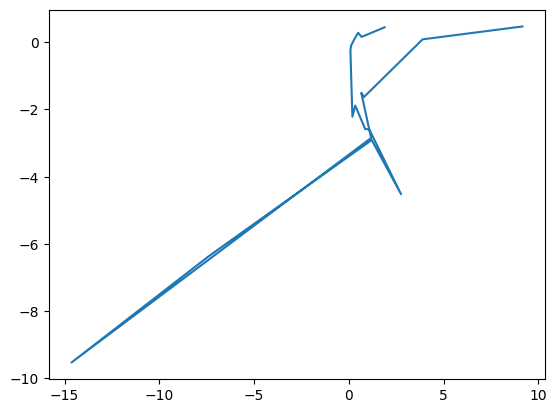

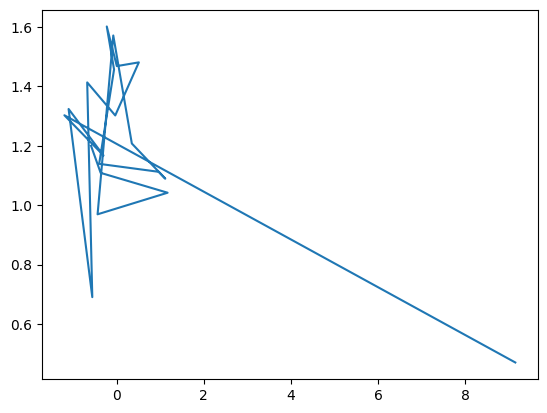

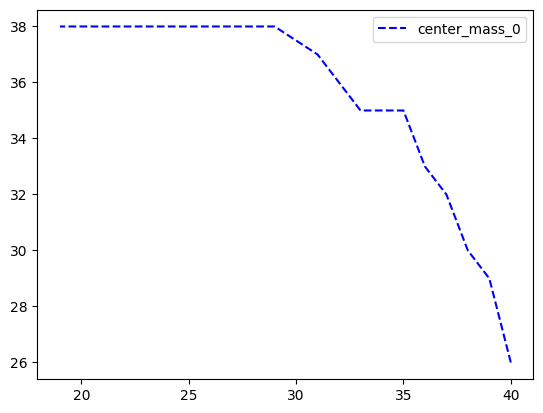

In [84]:
visual_loader  = loader.getLoader_folder(data_train, split=False)
vu.vis_chaos(latentEncoder, visual_loader)